# Custom Distributions

If the predefined distributions in QDFlow are insufficient, you can create your
own distributions. To do this, you will need to extend the `Distribution` class
and implement the `draw()` method.

In [1]:
import tutorial_helper
from qdflow.util import distribution
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define a custom distribution
class ChiSquare(distribution.Distribution):

    # The init method should store any parameters that define the distribution
    def __init__(self, degrees_freedom):
        self.df = degrees_freedom

    # The draw() method should return a single value if size is None,
    # or a numpy array with shape size, if size is an int or tuple of ints
    def draw(self, rng, size=None):
        if size is None:
            return rng.chisquare(self.df)
        else:
            return rng.chisquare(self.df, size=size)

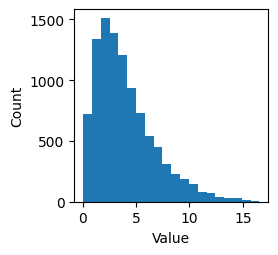

In [3]:
# Create an instance of the custom distribution
custom_dist = ChiSquare(4)

num_samples = 10000 # How many times to sample from each distribution

rng = np.random.default_rng(seed=5)

samples = custom_dist.draw(rng, num_samples)

# Plot results
fig, ax = plt.subplots(figsize=(2.5,2.5))
tutorial_helper.plot_dist_data(fig, ax, samples, bins=20)